In [30]:
import os
import pandas as pd

graph_data = pd.read_csv("srn_region_graph.csv", index_col=0)
graph_data = graph_data.drop(labels="Unnamed: 0", axis=1)

In [46]:
import networkx as nx

# create empty null graph
G = nx.DiGraph()
# create edges
edges = [(link.StartCluster, link.EndCluster) for ind, link in graph_data.iterrows()]
G.add_edges_from(edges)
# self loops removed
G.remove_edges_from(nx.selfloop_edges(G))

In [47]:
# create node positions - all junctions have a start junction (cluster)
pos = {link.StartCluster : (link.StartX, link.StartY) for ind, link in graph_data.iterrows()}

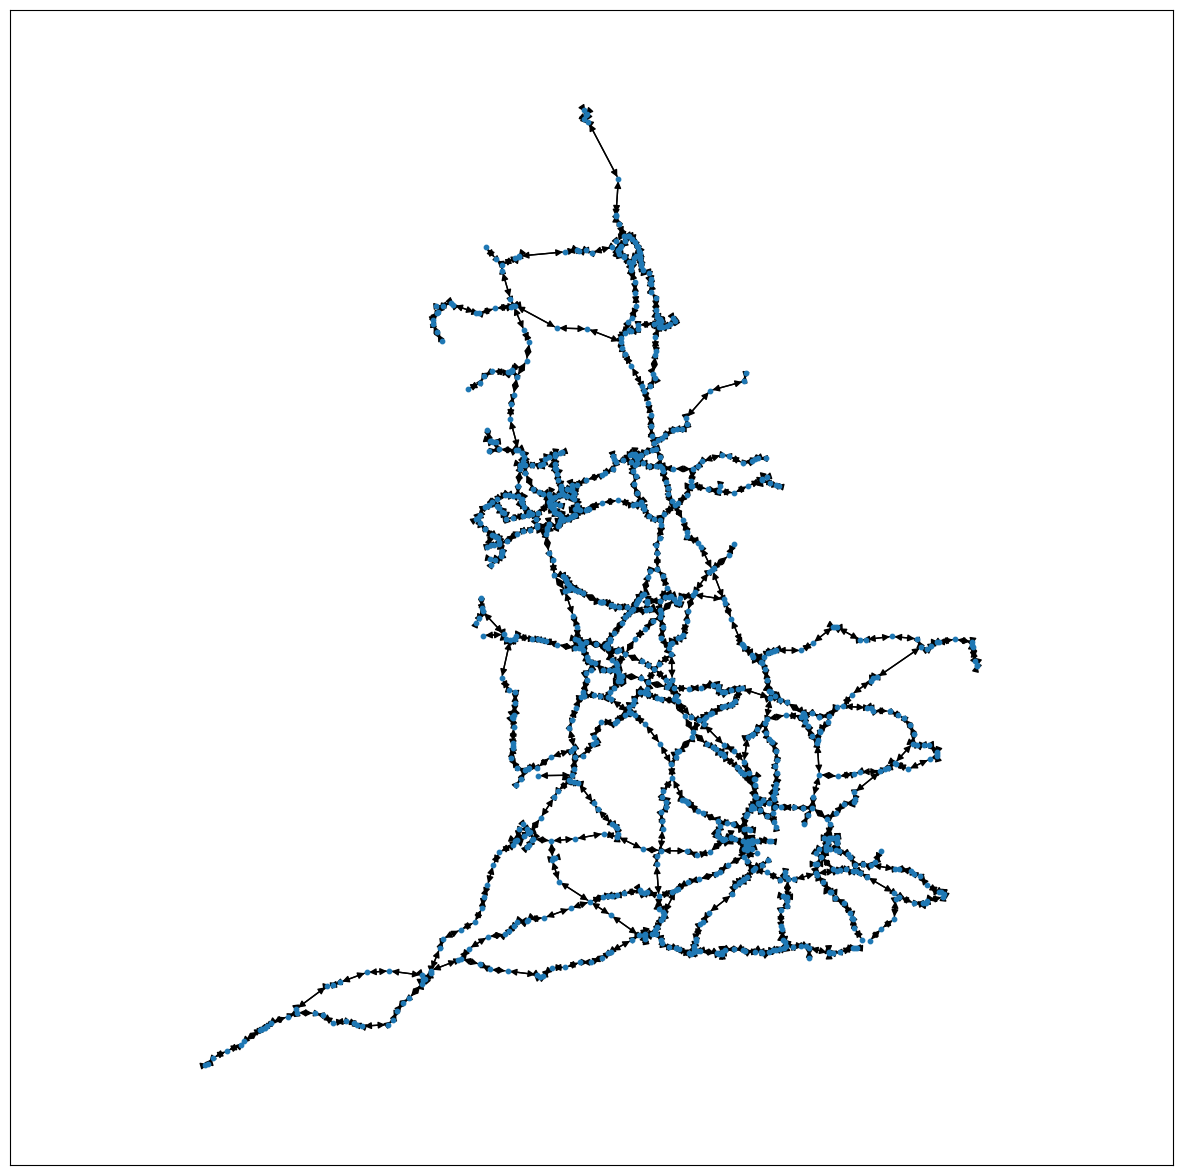

In [49]:
import matplotlib.pyplot as plt

# drawing
fig, ax = plt.subplots(1,1, figsize=(15, 15))
ax.axis("equal")
nx.draw_networkx(G, pos=pos, arrows=None, node_size=10, with_labels=False)